<a href="https://colab.research.google.com/github/paulapipkin/Cervical_Cancer_Risk-Factor/blob/main/Project_2_Cervical_Cancer_Risk_Paula_Pipkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project 2

- Paula Pipkin
- 8/4

###Intro

- Cervical Cancer Risk Factor Dataset

1) Source of data
- https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29# (UCI Machine Learning Repository)

2) Brief description of data
- This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.


3) What is the target?
- Feature Biopsy {1: Positive for CC, 0: Negative for CC}

4) Is this a classification or regression problem?
- Classification

5) How many features?
- 35 + Target

6) How many rows of data.
- 858

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- Facing so many variables, I believe my greatest challange will be finding the best model, I might have to try a few to see which one will be more adequated 

### Part 0 - Import Libraries and Load Data

In [101]:
import pandas as pd
import numpy as np

#prepare for ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import  make_column_transformer, make_column_selector

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix

#plot
import matplotlib.pyplot as plt

#customize
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')



In [102]:
df = pd.read_csv('/content/drive/MyDrive/BootCamp/PROJECT 2/risk_factors_cervical_cancer (1).csv')
print(df.shape)
print(df.isna().sum().sum())
df.head()

(858, 36)
0


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### Part 1 - Clean and explore the data set

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

- Many of the columns have '?' instead of a nan value, this is causing many coluns to be innterpreted as type object, and is also not computing the null values, so my first step is replacing all '?' with 'NaN'

In [104]:
df.replace('?', np.NaN, inplace=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

- Next I will convert all my object colums to float, since all my featureas are either a integer  or a 0/1 input


In [106]:
obj_cols = df.select_dtypes(exclude=['int64']).columns

df[obj_cols] = df[obj_cols].astype(float)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [108]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [109]:
df.duplicated().sum()

23

In [110]:
df.drop_duplicates(inplace=True)
df.shape

(835, 36)

- Target row has no missing values

In [111]:
df['Biopsy'].value_counts(normalize=True)

0    0.935329
1    0.064671
Name: Biopsy, dtype: float64

-  Data is not balanced

 - Columns STDs: Time since first diagnosis and STDs: Time since last diagnosis are missing 94% of the data, I'll drop those columns

In [112]:
df.drop(columns=[ 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], inplace=True)

In [113]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,735.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,0.002721,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,0.052129,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A value that cough my attention was 11 pregnacies, I will check this person's age to see if that was possible


In [114]:
df_prego = df.loc[df['Num of pregnancies']>6]
df_prego

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
17,43,3.0,15.0,8.0,0.0,0.000000,0.000000,1.0,3.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
100,34,3.0,15.0,7.0,0.0,0.000000,0.000000,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0
263,23,2.0,14.0,7.0,1.0,1.266973,0.513202,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
337,48,2.0,16.0,7.0,1.0,32.000000,8.000000,1.0,7.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
480,30,4.0,13.0,8.0,0.0,0.000000,0.000000,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
588,45,5.0,15.0,7.0,0.0,0.000000,0.000000,1.0,0.66,0.0,...,0.0,0,0,0,0,0,0,0,0,0
668,84,3.0,20.0,11.0,1.0,24.000000,0.513202,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,1,0,0
679,50,2.0,17.0,7.0,0.0,0.000000,0.000000,1.0,5.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
682,70,1.0,16.0,10.0,0.0,0.000000,0.000000,0.0,0.00,1.0,...,0.0,0,0,0,0,0,0,0,0,0
740,40,1.0,20.0,7.0,0.0,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0


- Copying data for ML vs EDA

In [115]:
df_ml =  df.copy()

- I will use mode ( most frequenty) to handle the missing values, but I want to use the whole dataset for EDA, that is why I'm making a copy of it, because in ML I will only input the missing values on the training data

- Univariate visuals 

-  I will create a univariate visual for the first 4 columsd so we can understand a little more about our data

In [116]:
df1 = df.iloc[: , :4]
df1.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies'],
      dtype='object')

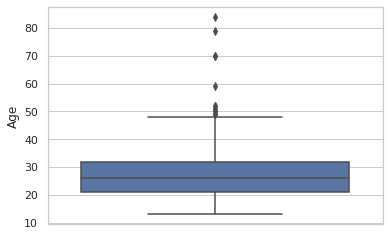

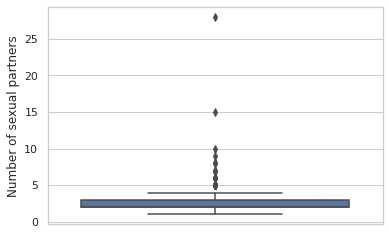

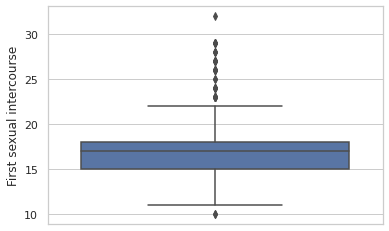

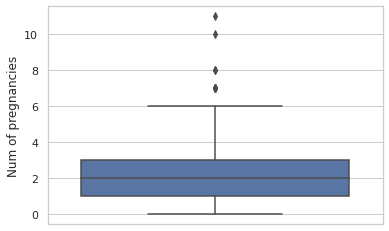

In [117]:
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(y=col, data=df1)